#Telco Customer Churn Prediction

In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Get dataset

In [204]:
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Turn yes/no into binary

In [205]:
data["Churn"] = data["Churn"].map(lambda x: 1 if x == "Yes" else 0)

In [206]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [207]:
data_numerical = data.select_dtypes(include='number')

data_numerical

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1
...,...,...,...,...
7038,0,24,84.80,0
7039,0,72,103.20,0
7040,0,11,29.60,0
7041,1,4,74.40,1


Correlation between features

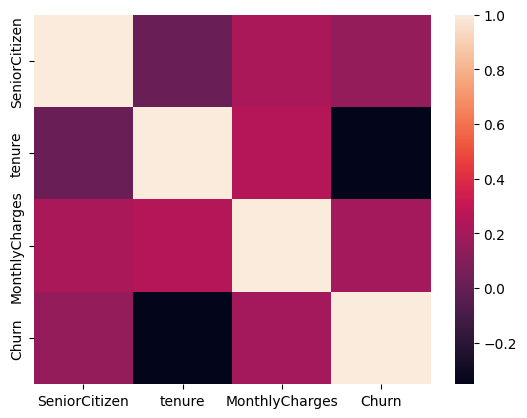

In [208]:
corr = data_numerical.corr()

plt.Figure(figsize=(20,20))
sns.heatmap(corr)
plt.show()

In [209]:
data["gender"] = data["gender"].map(lambda x: 1 if x == "Female" else 0)

data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,0,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,2234-XADUH,1,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,1,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,8361-LTMKD,0,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


In [210]:
data['MonthlyCharges'].corr(data['Churn'])

np.float64(0.1933564222378467)

custom id is irrelevant

In [211]:
data = data.drop(columns='customerID')
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,0,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,0,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,0,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,1,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0
7039,1,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0
7040,1,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0
7041,0,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1


Get some insights on how certain features influence churn

<Axes: xlabel='Churn'>

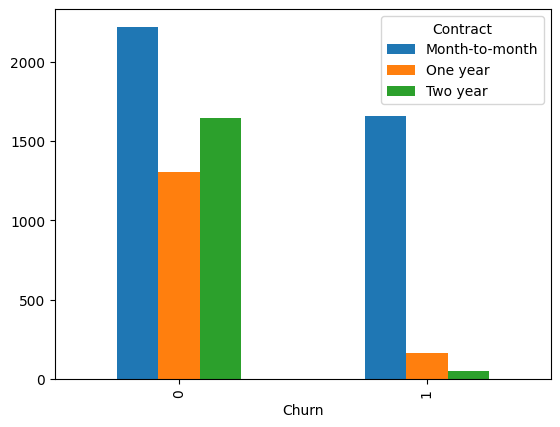

In [212]:
pivot_contract = data.pivot_table(index='Churn', columns='Contract', aggfunc='count', values='MonthlyCharges')
pivot_contract.plot(kind='bar')

Clients with one year to two year are less likely to churn

We can turn the variable into binary whether the client has a month-to-month contract or no

SERVICES

<Axes: xlabel='Churn'>

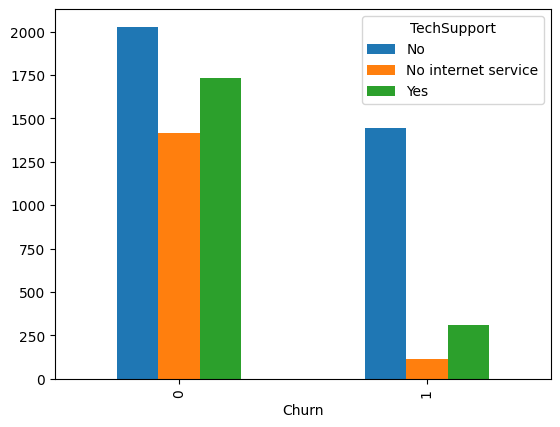

In [213]:
pivot_internet = data.pivot_table(index='Churn', columns='TechSupport', aggfunc='count', values='MonthlyCharges')
pivot_internet.plot(kind='bar')

<Axes: xlabel='Churn'>

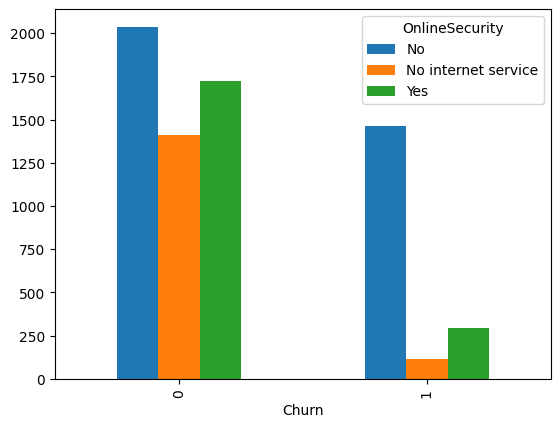

In [214]:
pivot_internet = data.pivot_table(index='Churn', columns='OnlineSecurity', aggfunc='count', values='MonthlyCharges')
pivot_internet.plot(kind='bar')

<Axes: xlabel='Churn'>

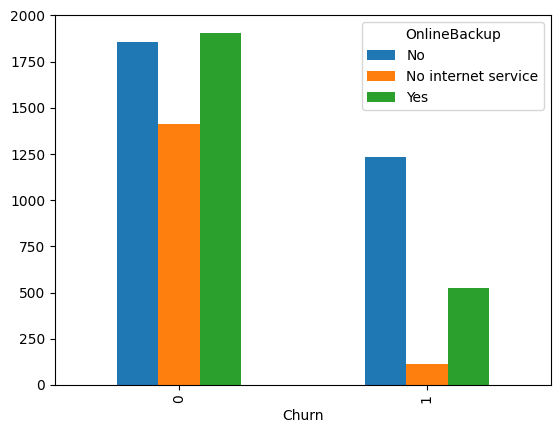

In [215]:
pivot_internet = data.pivot_table(index='Churn', columns='OnlineBackup', aggfunc='count', values='MonthlyCharges')
pivot_internet.plot(kind='bar')

<Axes: xlabel='Churn'>

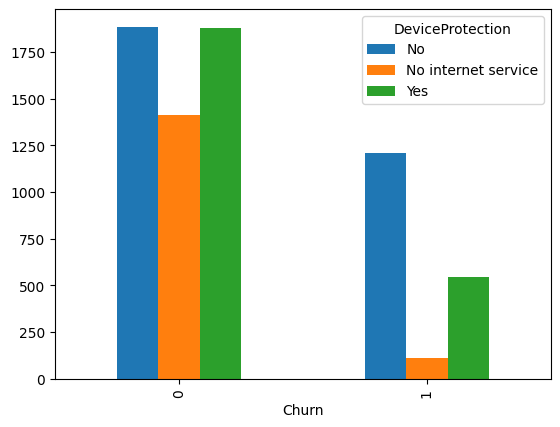

In [216]:
pivot_internet = data.pivot_table(index='Churn', columns='DeviceProtection', aggfunc='count', values='MonthlyCharges')
pivot_internet.plot(kind='bar')

Since clients with these 4 services, we can arrange them into a single variable

In [217]:
relevant_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']

data['services'] = data[relevant_services].apply(lambda x: (x == 'Yes').sum(), axis=1)
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,services
0,1,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,0,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.5,0,2
2,0,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,2
3,0,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3
4,1,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,...,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,0,3
7039,1,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,0,2
7040,1,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,1
7041,0,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,1,0


Drop irrelevant services

In [218]:
data = data.drop(columns=['PhoneService', 'MultipleLines', 'StreamingTV', 'StreamingMovies'])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,services
0,1,0,Yes,No,1,DSL,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1
1,0,0,No,No,34,DSL,Yes,No,Yes,No,One year,No,Mailed check,56.95,1889.5,0,2
2,0,0,No,No,2,DSL,Yes,Yes,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,2
3,0,0,No,No,45,DSL,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),42.30,1840.75,0,3
4,1,0,No,No,2,Fiber optic,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0


Modify contract variable

In [219]:
data['Contract'] = data['Contract'].apply(lambda x: 0 if x == 'Month-to-month' else 1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,services
0,1,0,Yes,No,1,DSL,No,Yes,No,No,0,Yes,Electronic check,29.85,29.85,0,1
1,0,0,No,No,34,DSL,Yes,No,Yes,No,1,No,Mailed check,56.95,1889.5,0,2
2,0,0,No,No,2,DSL,Yes,Yes,No,No,0,Yes,Mailed check,53.85,108.15,1,2
3,0,0,No,No,45,DSL,Yes,No,Yes,Yes,1,No,Bank transfer (automatic),42.30,1840.75,0,3
4,1,0,No,No,2,Fiber optic,No,No,No,No,0,Yes,Electronic check,70.70,151.65,1,0


In [220]:
data = data.drop(columns=['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport'])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,services
0,1,0,Yes,No,1,DSL,0,Yes,Electronic check,29.85,29.85,0,1
1,0,0,No,No,34,DSL,1,No,Mailed check,56.95,1889.5,0,2
2,0,0,No,No,2,DSL,0,Yes,Mailed check,53.85,108.15,1,2
3,0,0,No,No,45,DSL,1,No,Bank transfer (automatic),42.30,1840.75,0,3
4,1,0,No,No,2,Fiber optic,0,Yes,Electronic check,70.70,151.65,1,0


In [221]:
data['PaymentMethod'] = data['PaymentMethod'].apply(lambda x: 0 if x == 'Electronic check' else 1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,services
0,1,0,Yes,No,1,DSL,0,Yes,0,29.85,29.85,0,1
1,0,0,No,No,34,DSL,1,No,1,56.95,1889.5,0,2
2,0,0,No,No,2,DSL,0,Yes,1,53.85,108.15,1,2
3,0,0,No,No,45,DSL,1,No,1,42.30,1840.75,0,3
4,1,0,No,No,2,Fiber optic,0,Yes,0,70.70,151.65,1,0


In [222]:
data = data.drop(columns=['PaperlessBilling'])
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,services
0,1,0,Yes,No,1,DSL,0,0,29.85,29.85,0,1
1,0,0,No,No,34,DSL,1,1,56.95,1889.5,0,2
2,0,0,No,No,2,DSL,0,1,53.85,108.15,1,2
3,0,0,No,No,45,DSL,1,1,42.30,1840.75,0,3
4,1,0,No,No,2,Fiber optic,0,0,70.70,151.65,1,0


In [223]:
data['Partner'] = data['Partner'].apply(lambda x: 0 if x == 'No' else 1)
data['Dependents'] = data['Dependents'].apply(lambda x: 0 if x == 'No check' else 1)
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,services
0,1,0,1,1,1,DSL,0,0,29.85,29.85,0,1
1,0,0,0,1,34,DSL,1,1,56.95,1889.5,0,2
2,0,0,0,1,2,DSL,0,1,53.85,108.15,1,2
3,0,0,0,1,45,DSL,1,1,42.30,1840.75,0,3
4,1,0,0,1,2,Fiber optic,0,0,70.70,151.65,1,0


<Axes: xlabel='Churn'>

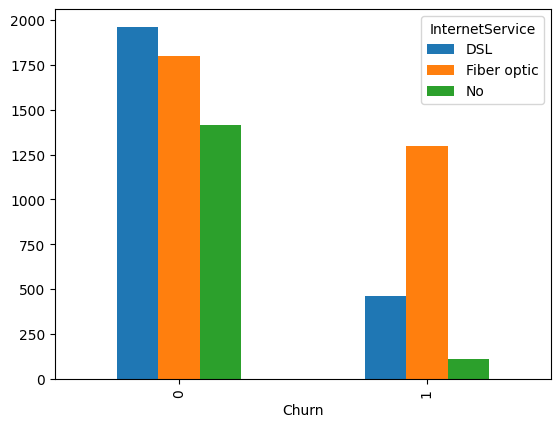

In [224]:
pivot_internet = data.pivot_table(index='Churn', columns='InternetService', aggfunc='count', values='MonthlyCharges')
pivot_internet.plot(kind='bar')

Most of the clients who churn have Fiber optic as Inr«ternet Service, we can turn this into a new feature

In [225]:
data['FiberOptic'] = data['InternetService'].apply(lambda x: 1 if x == 'Fiber optic' else 0)
data['InternetService'] = data['InternetService'].apply(lambda x: 0 if x == 'No' else 1)

data = data.drop(columns=['gender'])

data.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,services,FiberOptic
0,0,1,1,1,1,0,0,29.85,29.85,0,1,0
1,0,0,1,34,1,1,1,56.95,1889.5,0,2,0
2,0,0,1,2,1,0,1,53.85,108.15,1,2,0
3,0,0,1,45,1,1,1,42.30,1840.75,0,3,0
4,0,0,1,2,1,0,0,70.70,151.65,1,0,1


In [226]:
data['tenure'] = data['tenure'].apply(lambda x : 0 if x <= 12 else 1)

data.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,services,FiberOptic
0,0,1,1,0,1,0,0,29.85,29.85,0,1,0
1,0,0,1,1,1,1,1,56.95,1889.5,0,2,0
2,0,0,1,0,1,0,1,53.85,108.15,1,2,0
3,0,0,1,1,1,1,1,42.30,1840.75,0,3,0
4,0,0,1,0,1,0,0,70.70,151.65,1,0,1


In [227]:
data = data[data['TotalCharges'] != ' ']

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   SeniorCitizen    7032 non-null   int64  
 1   Partner          7032 non-null   int64  
 2   Dependents       7032 non-null   int64  
 3   tenure           7032 non-null   int64  
 4   InternetService  7032 non-null   int64  
 5   Contract         7032 non-null   int64  
 6   PaymentMethod    7032 non-null   int64  
 7   MonthlyCharges   7032 non-null   float64
 8   TotalCharges     7032 non-null   object 
 9   Churn            7032 non-null   int64  
 10  services         7032 non-null   int64  
 11  FiberOptic       7032 non-null   int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 714.2+ KB


scale data for logistic regression

In [228]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

y = data['Churn']
X = data.drop(columns=['Churn'])

scaled_x = scaler.fit_transform(X)

scaled_x

array([[-0.44032709,  1.03561683,  0.        , ..., -0.99419409,
        -0.20631429, -0.88689648],
       [-0.44032709, -0.9656081 ,  0.        , ..., -0.17373982,
         0.57117879, -0.88689648],
       [-0.44032709, -0.9656081 ,  0.        , ..., -0.95964911,
         0.57117879, -0.88689648],
       ...,
       [-0.44032709,  1.03561683,  0.        , ..., -0.85451414,
        -0.20631429, -0.88689648],
       [ 2.27103902,  1.03561683,  0.        , ..., -0.87209546,
        -0.98380736,  1.12752731],
       [-0.44032709, -0.9656081 ,  0.        , ...,  2.01234407,
         1.34867186,  1.12752731]])

In [229]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


In [234]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report
from imblearn.pipeline import Pipeline

In [244]:
X_train, X_test, y_train, y_test = train_test_split(scaled_x, y, train_size=0.7, stratify=y, random_state=42)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('logreg', LogisticRegression(random_state=42))
])

param_grid = {
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, n_jobs=-1, scoring='f1', verbose=1)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred):.4f}")

Fitting 3 folds for each of 1 candidates, totalling 3 fits

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.73      0.80      1549
           1       0.50      0.77      0.61       561

    accuracy                           0.74      2110
   macro avg       0.70      0.75      0.71      2110
weighted avg       0.79      0.74      0.75      2110

AUC-ROC: 0.8275
F1-score : 0.6083


In [246]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

pipeline = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('clf', DecisionTreeClassifier(random_state=42))
])

param_grid = {
    'clf__max_depth': [5, 10, 15, None],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4],
    'clf__criterion': ['gini', 'entropy'],
    'clf__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Best Parameters:")
print(grid_search.best_params_)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred):.4f}")


Fitting 3 folds for each of 144 candidates, totalling 432 fits
Best Parameters:
{'clf__class_weight': None, 'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1291
           1       0.54      0.68      0.60       467

    accuracy                           0.76      1758
   macro avg       0.70      0.73      0.71      1758
weighted avg       0.78      0.76      0.77      1758

AUC-ROC: 0.8140
F1-score : 0.5991


In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

pipeline = Pipeline([
    ('clf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [10, 20, None],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2],
    'clf__class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    scoring='f1',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("Best Parameters:")
print(grid_search.best_params_)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"AUC-ROC: {roc_auc_score(y_test, y_proba):.4f}")
print(f"F1-score : {f1_score(y_test, y_pred):.4f}")

Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters:
{'clf__class_weight': 'balanced', 'clf__max_depth': 10, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1291
           1       0.55      0.74      0.63       467

    accuracy                           0.77      1758
   macro avg       0.72      0.76      0.73      1758
weighted avg       0.80      0.77      0.78      1758

AUC-ROC: 0.8335
F1-score : 0.6325


The models performs with accuracy around 74-77% with maximum acuracy with the Random Forest Classifier.

There is a high precision on detecting non churners (89% precision)

There is a low precision on detecting churners, and the high recall on churners tells us that the lack of precision is due to false positives.
In a business context, it's better to predict a false churner than miss an actual churner. This model pays that trade-off in false positives.